
## Caso de estudio 1: ítem 2

   En el archivo Curvas\_Medidas\_RLC\_2025.xls (datos en la hoja 1 y etiquetas en la hoja  2) están las series de datos que sirven para deducir los valores de R, L y C del circuito. Emplear  el método de la respuesta al escalón, tomando como salida la tensión en el capacitor.



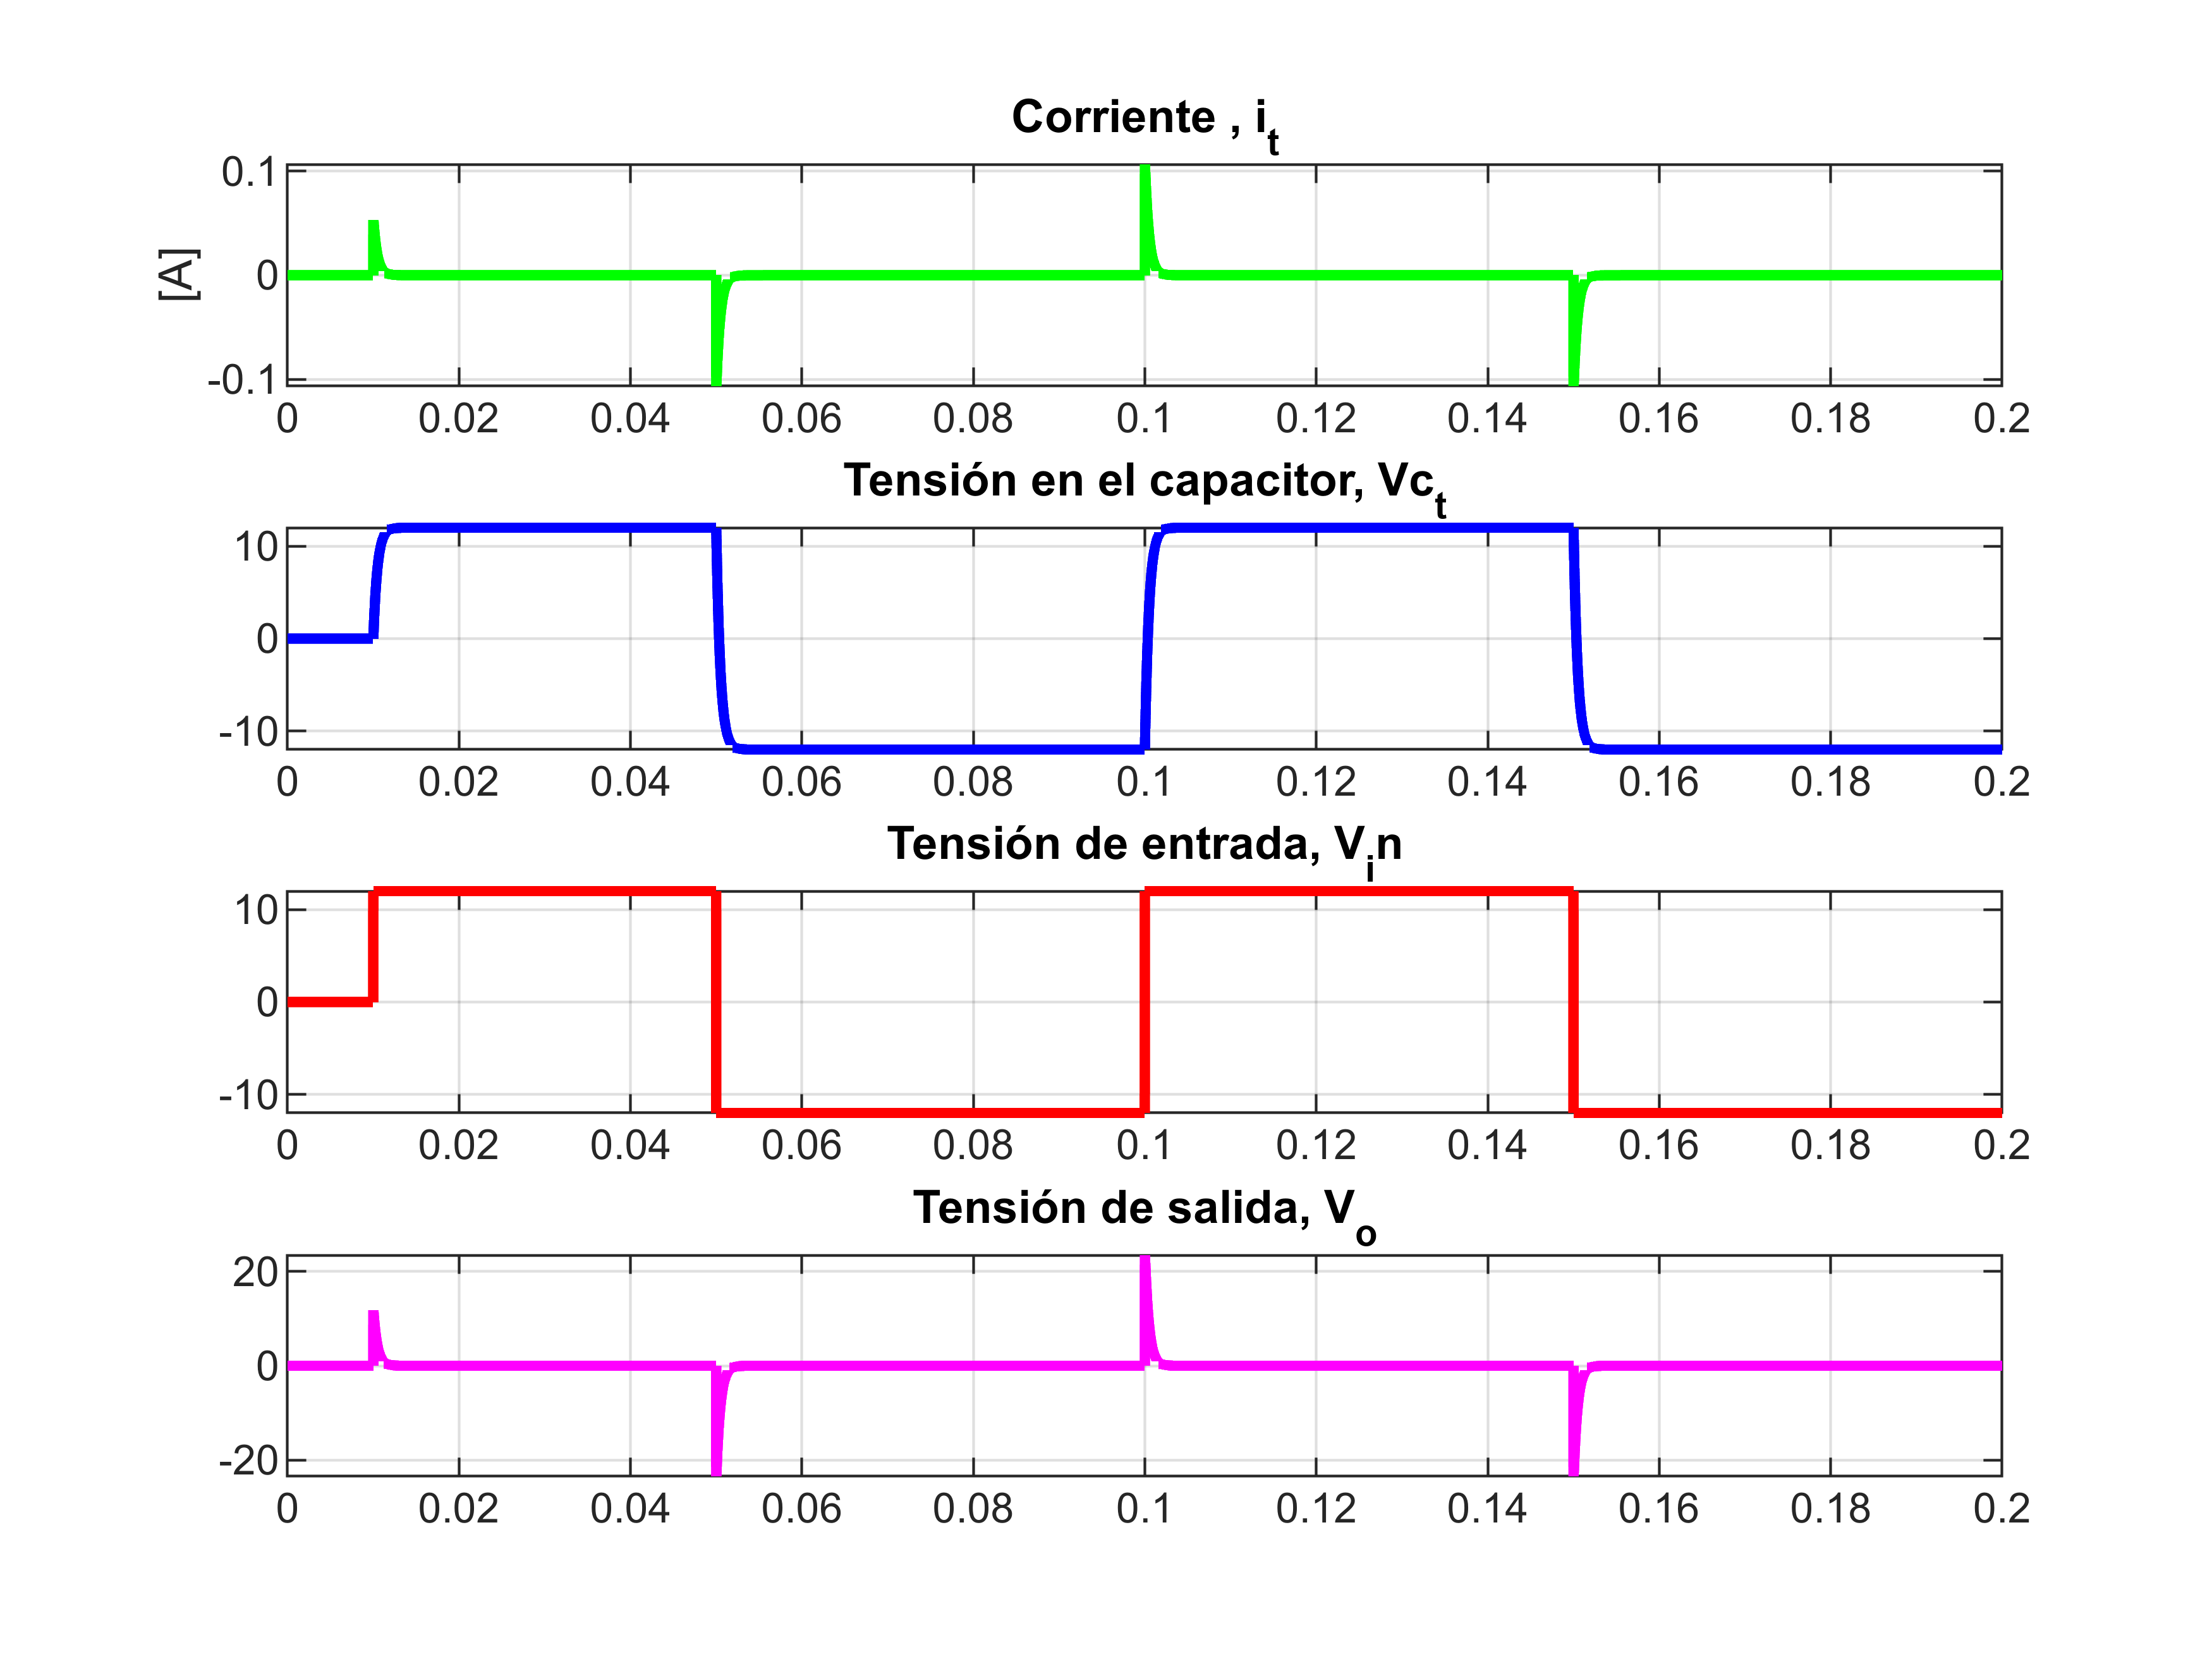

In [1]:
clc; clear all; close all;

%% Import data from spreadsheet
%% Set up the Import Options and import the data
opts = spreadsheetImportOptions("NumVariables", 5);

% Specify sheet and range
opts.Sheet = "Hoja1";
opts.DataRange = "A1:E20001";

% Specify column names and types
opts.VariableNames = ["VarName1", "VarName2", "VarName3", "VarName4", "VarName5"];
opts.VariableTypes = ["double", "double", "double", "double", "double"];

% Import the data
tbl = readtable("C:\Users\Maca\Documents\UNC\4toAÑO\1CUATRI\SC2\Folder Github TP´s\Control-System-II-TP-s\TP1\documentation\Curvas_Medidas_RLC_2025.xls", opts, "UseExcel", false);

%% Convert to output type
t = tbl.VarName1;
I = tbl.VarName2;
V_c = tbl.VarName3;
V_in = tbl.VarName4;
V_o = tbl.VarName5;

%% Clear temporary variables
clear opts tbl

figure; % Creación de la figura sin especificar un número, MATLAB asignará automáticamente
hold on

% Primera subgráfica - Tensión de entrada
subplot(4,1,1);
plot(t, I, 'g', 'LineWidth', 2);
title('Corriente , i_t');
grid on;

% Segunda subgráfica - Tensión en el capacitor
subplot(4,1,2);
plot(t, V_c, 'b', 'LineWidth', 2);
title('Tensión en el capacitor, Vc_t');
grid on;

% Tercera subgráfica - Corriente
subplot(4,1,3);
plot(t, V_in, 'r', 'LineWidth', 2);
title('Tensión de entrada, V_in'); % Corrigiendo el título, antes decía "Corriente"
grid on;

% Cuarta subgráfica - Tensión de salida
subplot(4,1,4);
plot(t, V_o, 'm', 'LineWidth', 2);
title('Tensión de salida, V_o'); % Evitando duplicación incorrecta del título "Corriente"
grid on;

subplot(4,1,1)
ylabel("[A]")



Para encontrar la Función de transferencia se aplica "El artículo de Chen" con sus respectivas fórmulas


In [2]:
% Apply The Second-Order Systems with differents poles method

% y(t1)= K*(1+ ((T3-T1)/(T1-T2))*exp(-(t1/T1))- (((T3-T2)/(T1-T2))*exp(-t1/T2)));
% y(2*t1)= K*(1+ ((T3-T1)/(T1-T2))*exp(-(2*t1/T1))- (((T3-T2)/(T1-T2))*exp(-(2*t1)/T2)));
% y(3*t1)= K*(1+ ((T3-T1)/(T1-T2))*exp(-(3*t1/T1))- (((T3-T2)/(T1-T2))*exp(-(3*t1)/T2)));

% Obtain maximium value from t (RLC circuit measure).
max_t= max(t);

% Define step amplitude.
stepAmplitude= 1;

% Take time and voltage arrays
% Time array.
t0= t;
%Vc array.
y=V_c;

% Chen Method application
% Take three point to apply Chen Method.
% First point time.
%i= 1251;
i= 1051;
t_inic= t0(i);
% Define step.
h= 55;
% Obtain y1.
t_t1= t0(i);
y_t1= y(i)

y_t1 = 7.7301

In [3]:
% Obtain y2.
t_2t1= t0(i+h);
y_2t1= y(i+h)

y_2t1 = 10.6369

In [4]:
% Obtain y3.
t_3t1= t0(i+(2*h));
y_3t1= y(i+(2*h))

y_3t1 = 11.5649

In [5]:

% Normalize gain
% Add abs(y(end)), because 'end' take value= -12V (Alternate input signal).
K= abs(y(end))/(stepAmplitude)

K = 12.0000

In [6]:

% Calculating k1, k2, k3.
k1= ((y_t1)/K)-1;
k2= ((y_2t1)/K)-1;
k3= ((y_3t1)/K)-1;

% Calculating b, alfa1, alfa2.
b= 4*(k1^(3))*k3- 3*(k1^2)*(k2^2)- 4*(k2^3)+ (k3^2)+ 6*k1*k2*k3;
alfa1= (k1*k2+ k3- sqrt(b))/(2*((k1^2)+ k2));
alfa2= (k1*k2+ k3+ sqrt(b))/(2*((k1^2)+ k2));

% Calculating Beta.
% beta= (2*(k1^3)+ 3*k1*k2+ k3- sqrt(b))/(sqrt(b));
% Alternative
beta= (k1+alfa2)/(alfa1-alfa2);

% Calculating the estimates of the time constants T1, T2 and T3.
% T1_e= -(t_t1)/(log(alfa1))
% T2_e= -(t_t1)/(log(alfa2)) %imaginary from alfa2
% deltaTime= 5.5e-4
T1_e= -(5.5e-4)/(log(alfa1));
T2_e= -(5.5e-4)/(log(alfa2));
T3_e= beta*(T1_e- T2_e)+ T1_e;

% Add estimates of the time constants T1, T2, T3.
ii= 1;
T1(ii)= T1_e;
T2(ii)= T2_e;
T3(ii)= T3_e;

% Enhancing estimation accuracy.
T1_e= sum(T1/ length(T1))

T1_e = 2.2014e-05

In [7]:
T2_e= sum(T2/ length(T2))

T2_e = 4.8167e-04

In [8]:
T3_e= sum(T3/ length(T3))

T3_e = -3.0695e-05

In [9]:

% Build Transfer Function
s= tf('s');
sys= (K)/((T1_e*s+1)*(T2_e*s+1)); %%sin retardo
sys1= (K*exp(-s*0.01))/((T1_e*s+1)*(T2_e*s+1))

sys1 =
 
                               12
  exp(-0.01*s) * ------------------------------
1.06e-08 s^2 + 0.0005037 s + 1
 
Continuous-time transfer function.
Model Properties


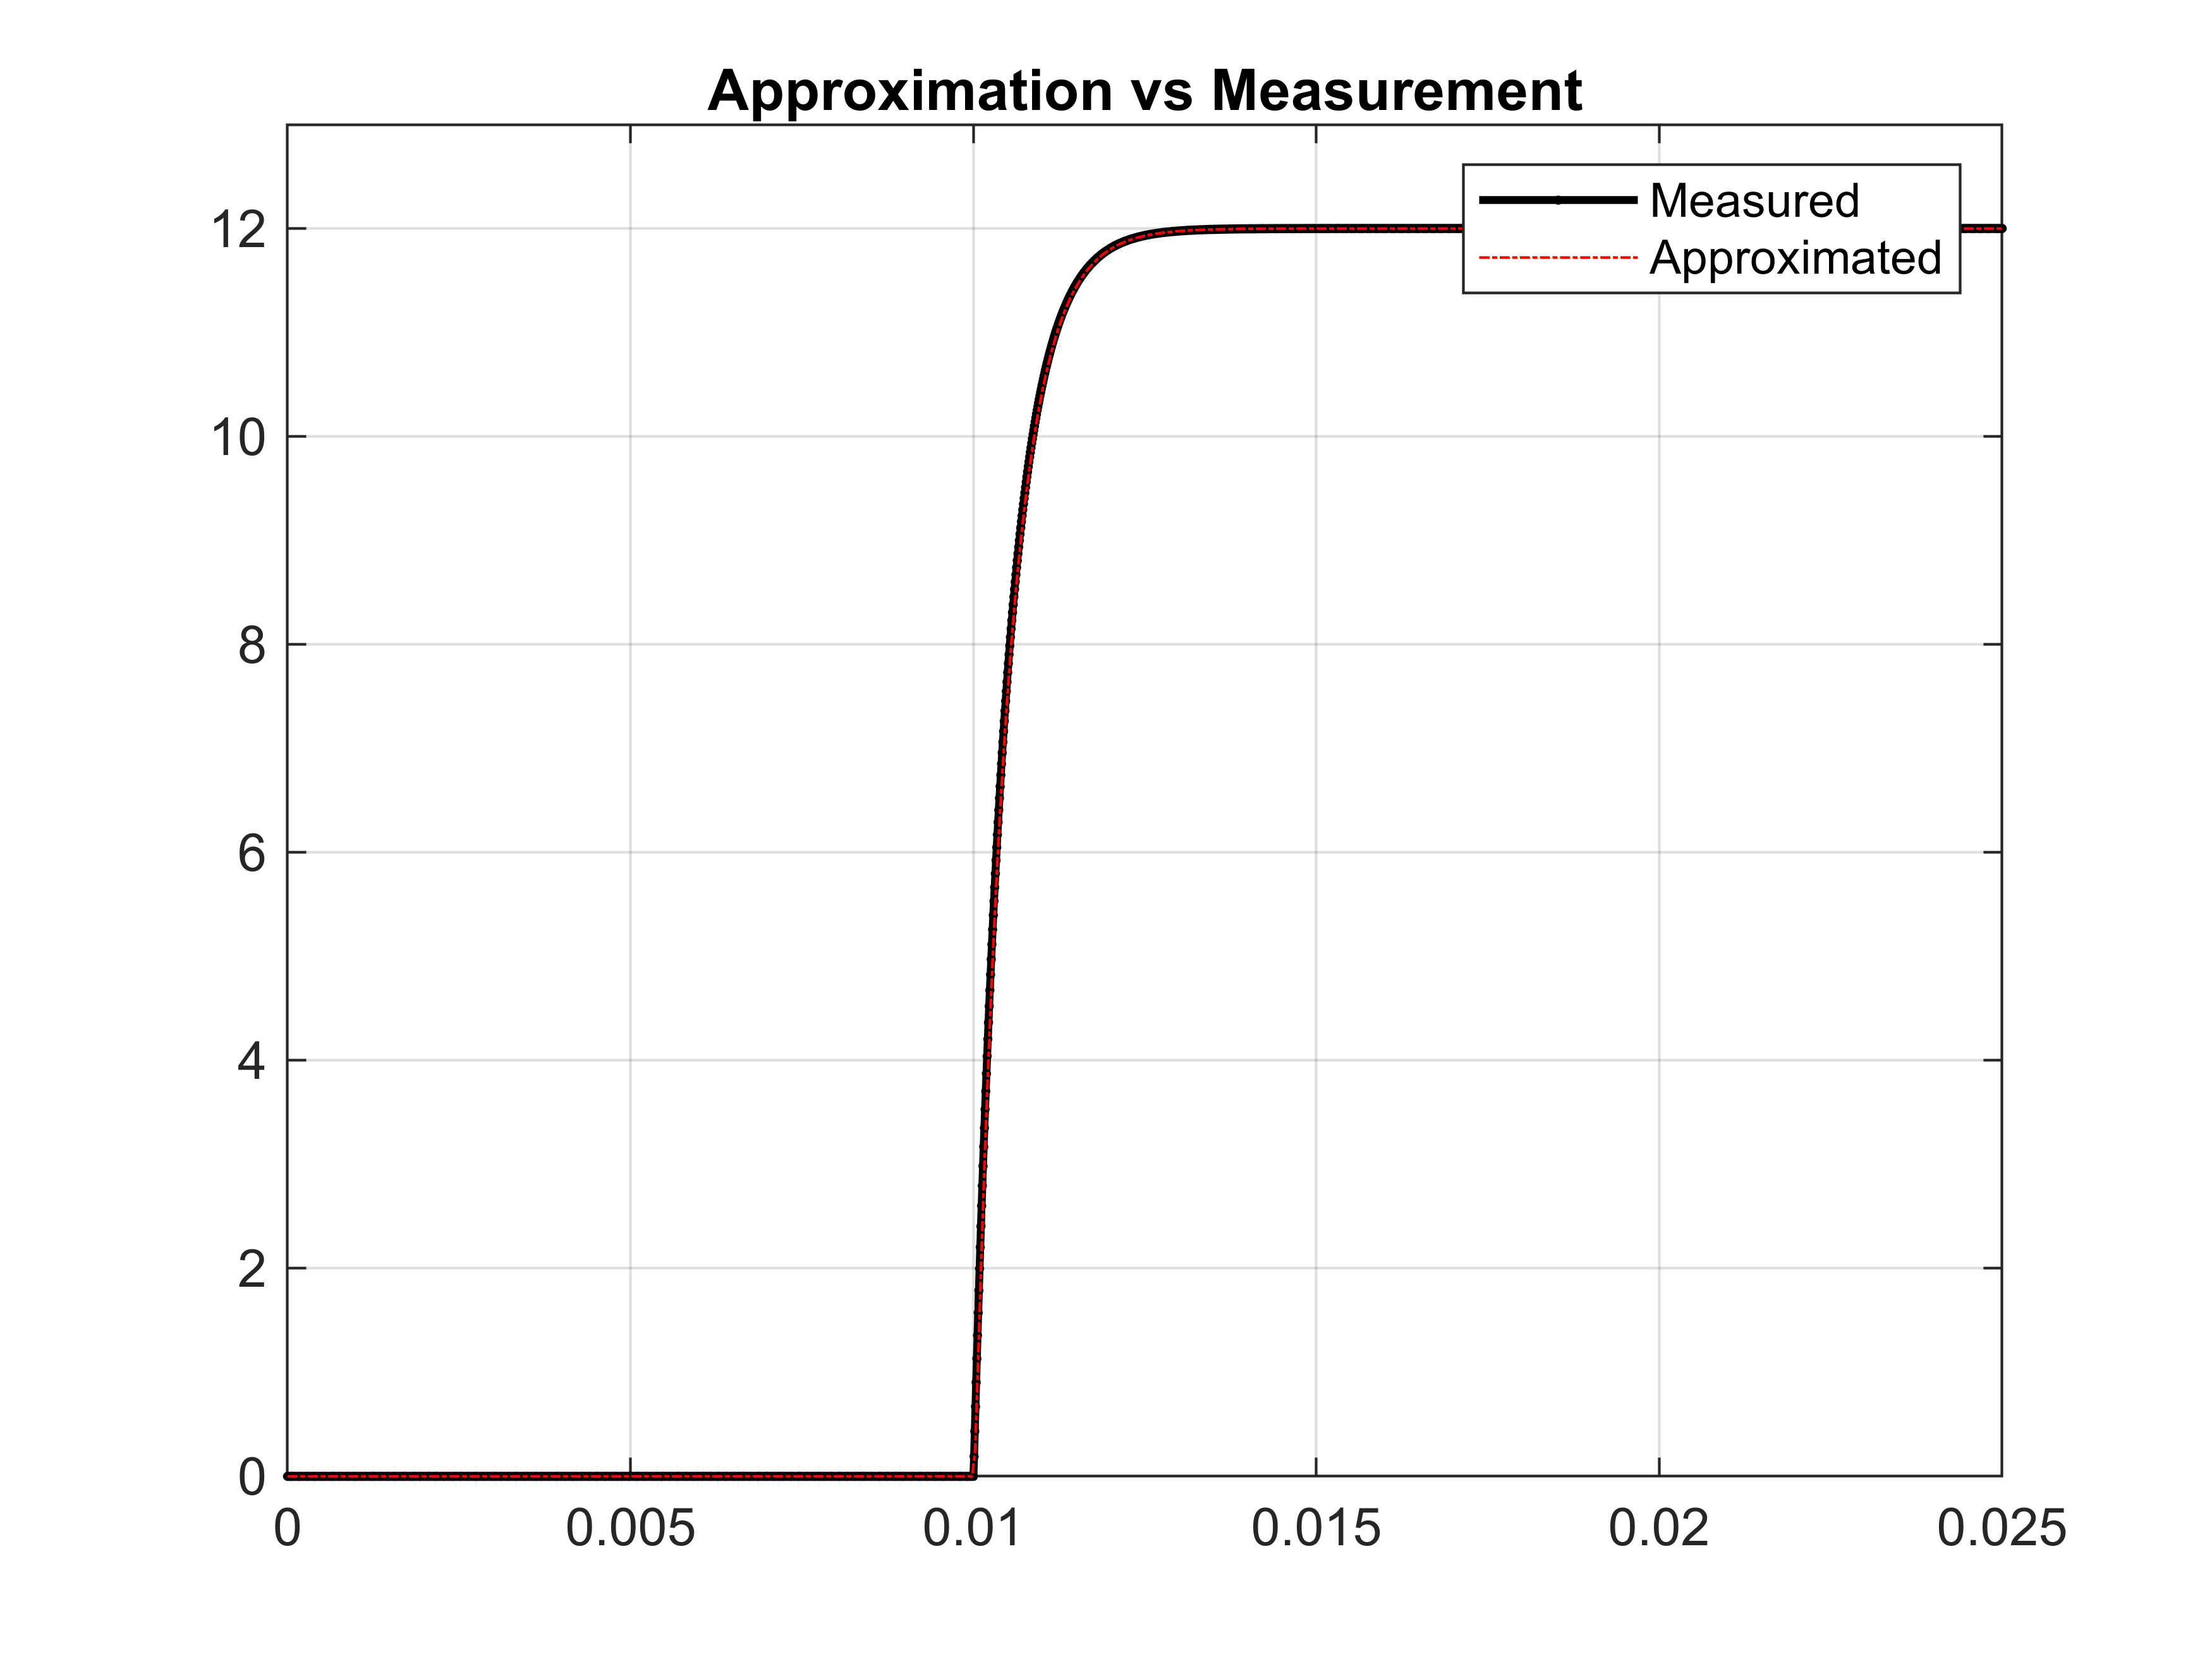

In [10]:
% [num, den]= tfdata(sys, 'v');

% Plot approximated step response
% Obtain step response with delay.
% [ys, ts]= step(sys*exp(-s*0.01), 'r-', 0.16);
figure(2)
[ys, ts]= step(sys1, 'r-', 0.5);   %aproximada
plot(t, V_c, 'k.-','LineWidth',1.5); %medida
hold on;
plot(ts, ys, 'r-.');%aproximada
xlim([0, 0.025]);
ylim([0, 13]);
legend('Measured', 'Approximated');
title('Approximation vs Measurement');
grid on;



Ahora  con la FT de Chen y la FT de RLC  analítica encontrar L ,R,C   pero tendriamos 2 ec con 2 incgn entonces calcular C como : (agregar formulas


In [11]:
%Cálculo de capacitor
x1=1126

x1 = 1126

In [12]:
x2=x1+1

x2 = 1127

In [13]:
Cx1 = V_c(x1,1)

Cx1 = 11.1001

In [14]:
Cx2 = V_c(x2,1)

Cx2 = 11.1186

In [15]:
tx1 = t(x1,1)

tx1 = 0.0113

In [16]:
tx2 = t(x2,1)

tx2 = 0.0113

In [17]:
dVc = (Cx2-Cx1)/(tx2-tx1)

dVc = 1.8490e+03

In [18]:
ix1 = I(x1,1)

ix1 = 0.0041

In [19]:
Cap=ix1/dVc  % Cap=2.22[uF]

Cap = 2.2227e-06

In [20]:

%Cálculo de L y R
 %sujeto a modificar para que se despeje solo de las ft
sys %FT dado por el Articulo de Chen

sys =
 
                12
  ------------------------------
1.06e-08 s^2 + 0.0005037 s + 1
 
Continuous-time transfer function.
Model Properties

In [21]:
%FT analitica de RLC normalizada

% FT = ((1/L*Cap)/(s^2+s*(R/L)+(1/L*C))

[num,dem] = tfdata((sys),'v')

num = 1x3
         0         0   12.0000
dem = 1x3
    0.0000    0.0005    1.0000

In [22]:
%igualó numerador de sys y FT analitica y luego cada termino del
%denominador para encontrar R y L

L= dem(1,1)/Cap

L = 0.0048

In [23]:
R=dem(1,2)/Cap

R = 226.6088

In [24]:

% Puedes también comparar los polos:
polos_estimados = pole(sys);
polos_calculados = roots([L*Cap R*Cap 1]); % Polos de LC*s^2 + RC*s + 1 = 0
fprintf('Polos estimados (Chen): %f, %f\n', polos_estimados(1), polos_estimados(2));

Polos estimados (Chen): -45426.521261, -2076.125297

In [25]:
fprintf('Polos calculados (RLC): %f, %f\n', polos_calculados(1), polos_calculados(2));

Polos calculados (RLC): -45426.521261, -2076.125297

In [26]:
% Deberían ser similares si todo es consistente.



## Caso de estudio 1: ítem 3

   Una vez determinados los parámetros R, L y C, emplear la serie de corriente desde  0.05seg en adelante para validar el resultado superponiendo las gráficas.


In [27]:
% --- Punto 3: Validación usando la corriente ---

%FT= i(t)/Vin
% 1. Definir la FT para la corriente I(s)/Vin(s)
num_I = [Cap 0];            % Numerador: C*s + 0
den_I = [L*Cap R *Cap 1]; % Denominador: L*C*s^2 + R*C*s + 1
sys_I = tf(num_I, den_I);   % Crear el objeto de función de transferencia

% Mostrar la FT de corriente (opcional)
fprintf('\nFunción de Transferencia para Corriente I(s)/Vin(s):\n');

Función de Transferencia para Corriente I(s)/Vin(s):

In [28]:
disp(sys_I);

  tf with properties:
       Numerator: {[0 2.2227e-06 0]}
     Denominator: {[1.0603e-08 5.0368e-04 1]}
        Variable: 's'
         IODelay: 0
      InputDelay: 0
     OutputDelay: 0
       InputName: {''}
       InputUnit: {''}
      InputGroup: [1x1 struct]
      OutputName: {''}
      OutputUnit: {''}
     OutputGroup: [1x1 struct]
           Notes: [0x1 string]
        UserData: []
            Name: ''
              Ts: 0
        TimeUnit: 'seconds'
    SamplingGrid: [1x1 struct]


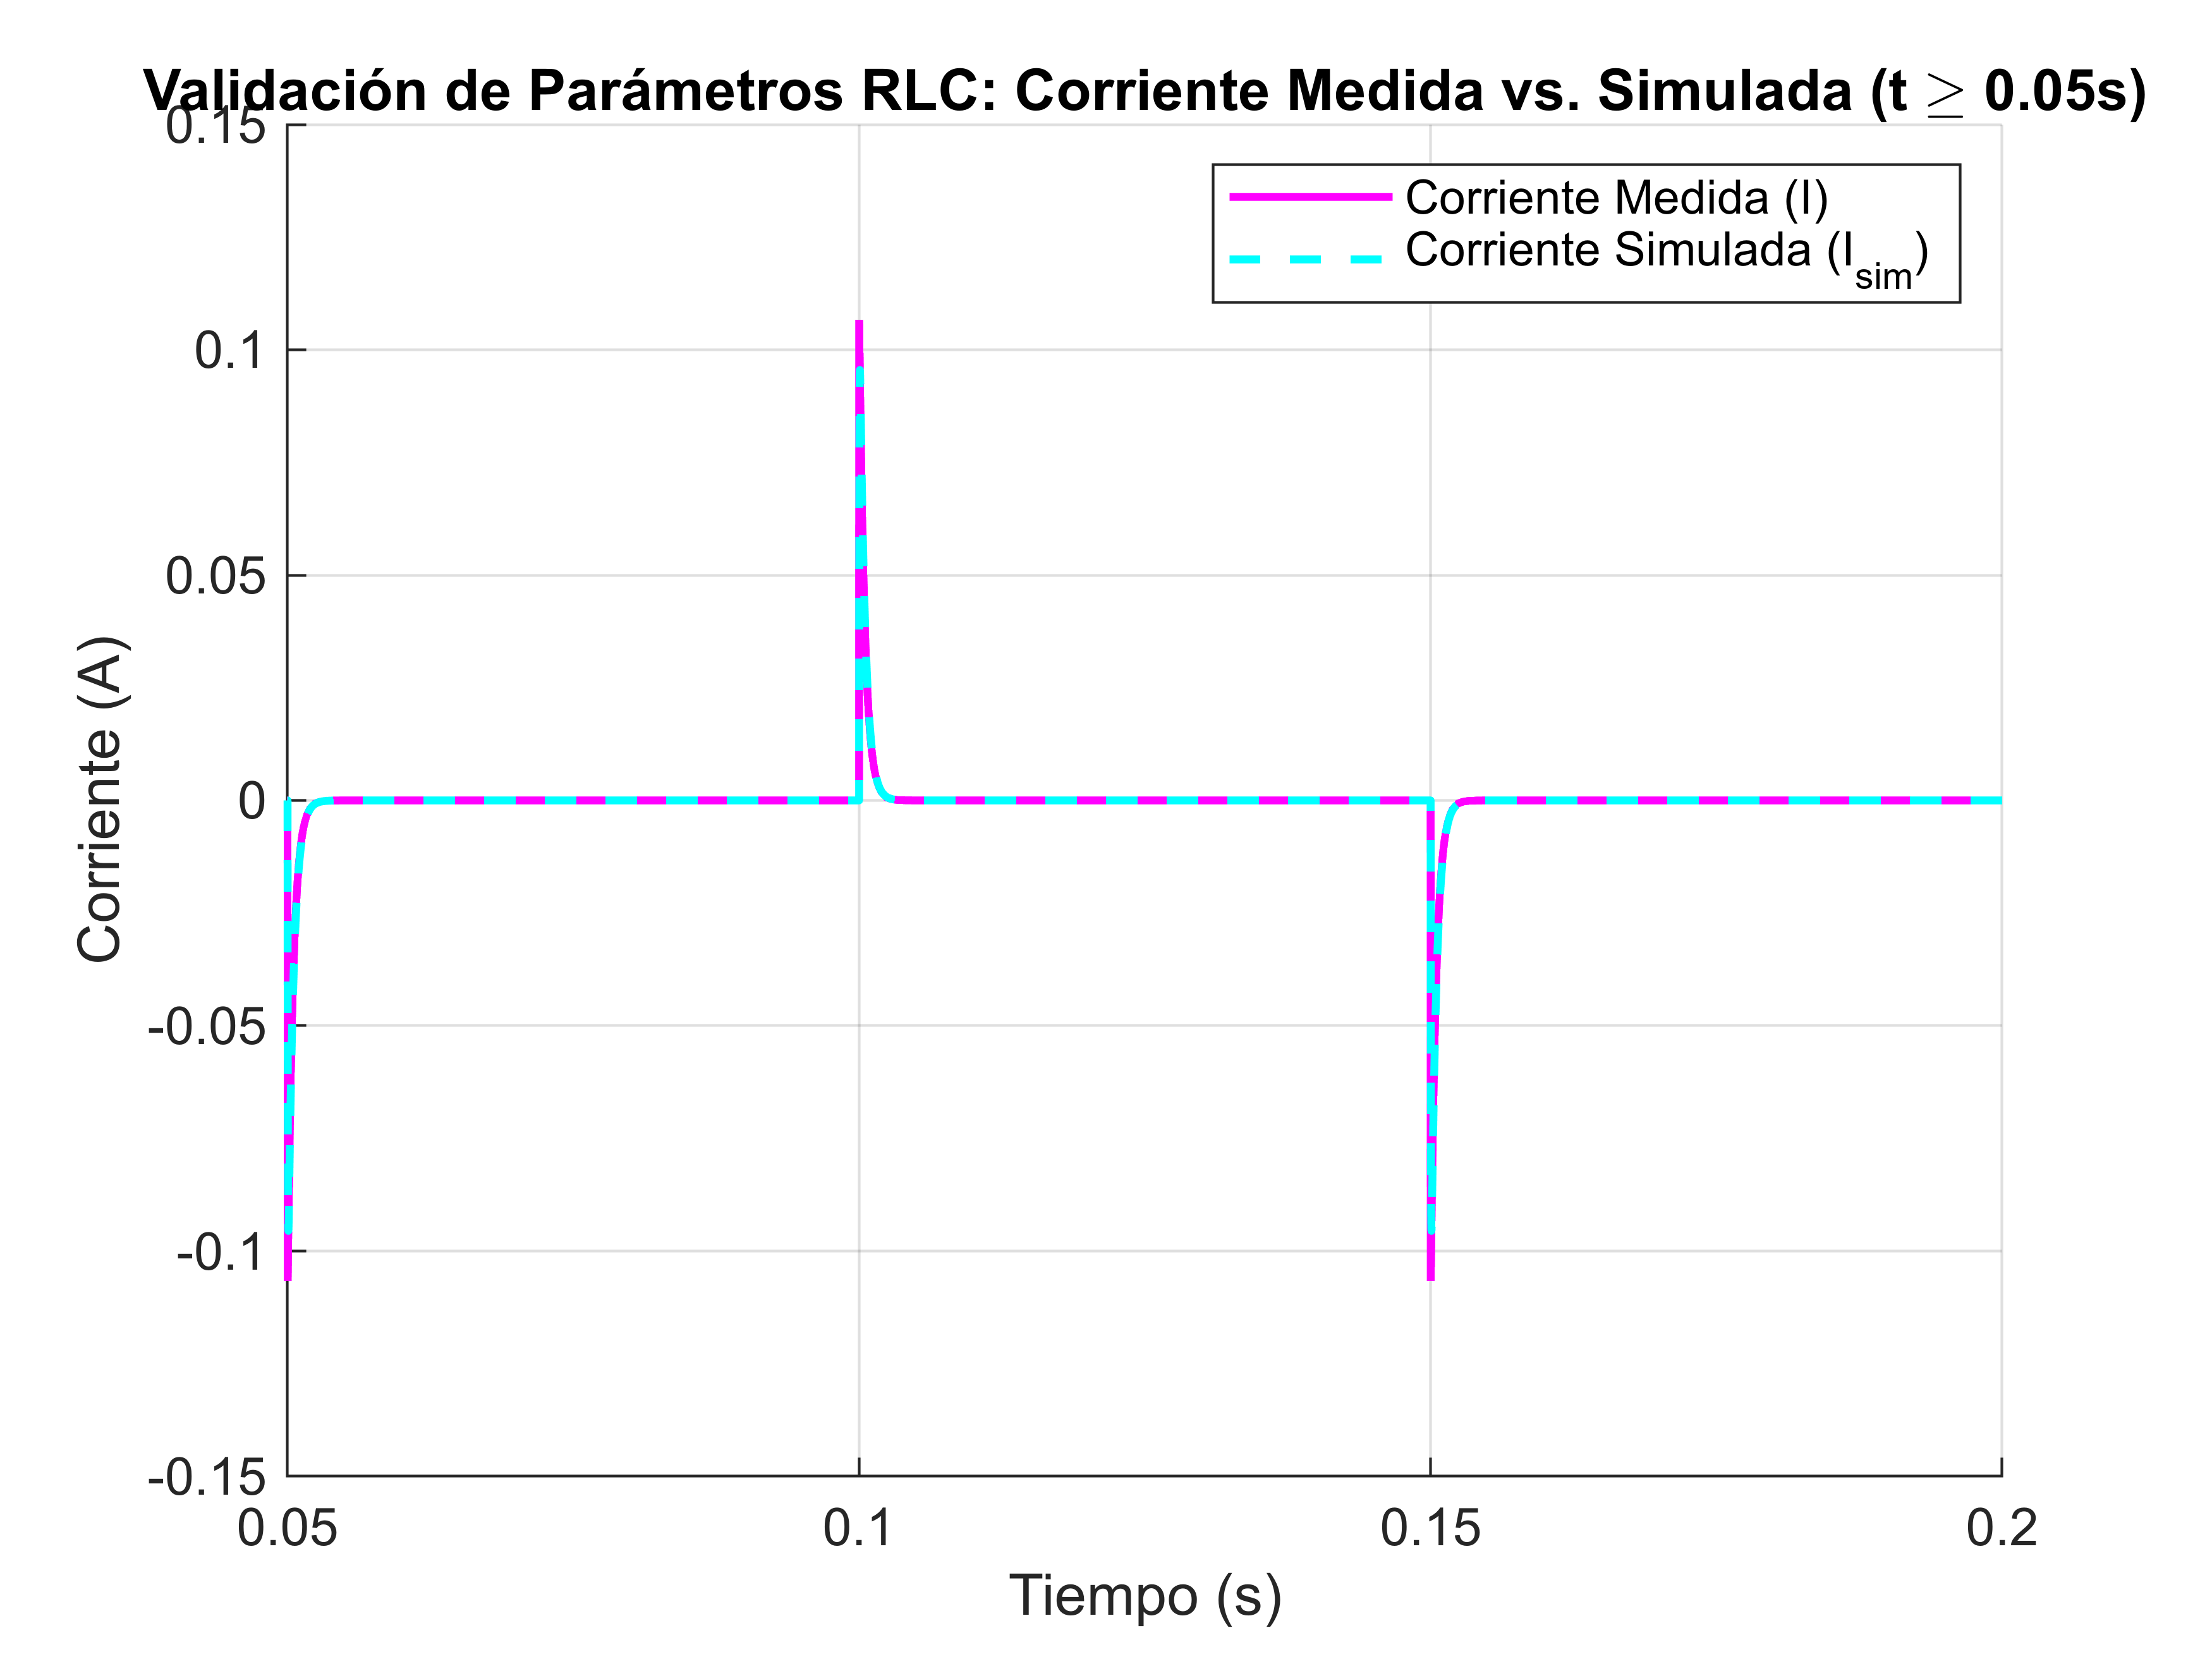

In [29]:

% 2. Simular la respuesta de corriente usando la V_in medida como entrada
% Usamos lsim(sistema, entrada, tiempo)
%"lsim" ES LO MISMO QUE APLICAR  EULER -> EL FOR DE PUNTO 1

[I_sim, t_sim] = lsim(sys_I, V_in, t);
% t_sim será igual a t en este caso

% 3. Graficar y comparar
figure; % Crear una nueva figura
hold on; % Mantener los plots en la misma figura

% Graficar la corriente medida
plot(t, I, 'm-', 'LineWidth', 1.5, 'DisplayName', 'Corriente Medida (I)');

% Graficar la corriente simulada
plot(t_sim, I_sim, 'c--', 'LineWidth', 1.5, 'DisplayName', 'Corriente Simulada (I_{sim})');

% 4. Ajustar la vista al rango solicitado y añadir detalles
xlim([0.05, max(t)]); % <-- Enfocar en t >= 0.05 segundos
xlabel('Tiempo (s)');
ylabel('Corriente (A)');
title('Validación de Parámetros RLC: Corriente Medida vs. Simulada (t \geq 0.05s)');
legend('show');
grid on;
hold off;

In [30]:

% --- Fin Punto 3 ---